In [1]:
# jmframe: I am making this script to loop through the nwm land surface files (LDAS)
# and combine all the years for each basin.
import copy
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import os
import pandas as pd
import pickle
import sys
import time
import tools
from tqdm import tqdm

In [29]:
data_v2_dir = '/home/NearingLab/data/nwm/v2/'
data_v2_dir_cam = '/home/NearingLab/data/nwm/v2/RT/camels_basins/'
proj_data_dir = '/home/NearingLab/projects/jmframe/lstm_camels/data/'
combine_years = True
average_days = False
start_end_year_list = [1993, 2018]
rest_of_years_list = [y for y in range(start_end_year_list[0]+1, start_end_year_list[1])]

In [3]:
# Here I am going to load all of the individual years with the collated data, 
# then put it together.
df = {}
# Load these as a samples no matter what, we want their start/end dates:
file_name_prefix = 'dynamic_features_nwm_RT_'
for y in start_end_year_list:
    with open(data_v2_dir_cam+file_name_prefix+str(y)+'.p', 'rb') as pf:
        df[y] = pickle.load(pf)

# Then the rest of the individual years, if needed
if combine_years:
    for y in rest_of_years_list:
        with open(data_v2_dir_cam+file_name_prefix+str(y)+'.p', 'rb') as pf:
            df[y] = pickle.load(pf)
else:
    print('RT years not loaded here')

In [4]:
basins = list(df[1993].keys())
sample_basin = basins[0]
firstdt = df[start_end_year_list[0]][sample_basin].index.values[0]
lastd = df[start_end_year_list[1]][sample_basin].index.values[-1]
date_listn= pd.date_range(start=firstdt, end=lastd, freq='3H')
feature_names = list(df[1993][sample_basin].columns.values)
n_dates = date_listn.shape[0]
n_features = len(feature_names)

In [5]:
# Set up the dictionary with a dataframe for each basin,
# then append in the year values from our files.
if combine_years:
    rt = {b:pd.DataFrame(columns=feature_names) for b in basins}
    for b in basins:
        for y in df.keys():
            rt[b] = rt[b].append(df[y][b])
        rt[b] = rt[b].sort_index()
else:
    print('LDAS years not combined here')

In [30]:
# Now average the basins by day, instead of 3 hour intervals.
if average_days:
    def daily_average(df):
        return(df.groupby(pd.Grouper(freq='1D')).mean())
    rt_v2_1day_ave = {k: daily_average(v) for (k, v) in rt.items()}
    
    for b in basins:
        rt_v2_1day_ave[b].index.name = 'time'
        rt_v2_1day_ave[b] = rt_v2_1day_ave[b].dropna()
        
    with open(data_v2_dir+'nwm_rt_v2_1d.p', 'wb') as f:
        pickle.dump(rt_v2_1day_ave, f)
else:
    print('Load data averaged by day')
    with open(data_v2_dir+'nwm_rt_v2_1d.p', 'rb') as pf:
        rt_v2_1day_ave = pickle.load(pf)

Load data averaged by day


In [33]:
rt_v2_1day_ave[sample_basin].iloc[s:s+10]

,mean_sfcheadsubrt,mean_zwattablrt,max_sfcheadsubrt,max_zwattablrt
time,,,,
1993-01-01,0.0,2.0,0.0,2.0
1993-01-02,0.0,2.0,0.0,2.0
1993-01-03,0.0,2.0,0.0,2.0
1993-01-04,0.0,2.0,0.0,2.0
1993-01-05,0.0,2.0,0.0,2.0
1993-01-06,0.0,2.0,0.0,2.0
1993-01-07,0.0,2.0,0.0,2.0
1993-01-08,0.0,2.0,0.0,2.0
1993-01-09,0.0,2.0,0.0,2.0


In [34]:
with open(proj_data_dir+'dynamic_features_nwm_v2.p', 'rb') as pf:
    v2_dyn_feat = pickle.load(pf)

In [35]:
s = 0
v2_dyn_feat[sample_basin].iloc[s:s+10]

,p_mean_dyn,pet_mean_dyn,aridity_dyn,t_mean_dyn,frac_snow_dyn,high_prec_freq_dyn,high_prec_dur_dyn,low_prec_freq_dyn,low_prec_dur_dyn,PET(mm/d),...,SOIL_W1,SOIL_W2,SOIL_W3,SOIL_W4,TRAD,UGDRNOFF,mean_sfcheadsubrt,mean_zwattablrt,max_sfcheadsubrt,max_zwattablrt
time,,,,,,,,,,,,,,,,,,,,,
1992-12-31,2.746110,1.227908,0.447145,156.760397,0.142857,19.0,1.055556,115.0,3.916667,0.066305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-01,2.746932,1.228716,0.447305,156.543425,0.142276,19.0,1.055556,116.0,3.852459,0.002673,...,0.133654,0.192147,0.308205,0.316667,269.142861,0.041955,0.0,2.0,0.0,2.0
1993-01-02,2.746932,1.229298,0.447517,156.403890,0.142276,19.0,1.055556,116.0,3.916667,-0.038977,...,0.132853,0.192436,0.308013,0.316250,259.899683,0.047051,0.0,2.0,0.0,2.0
1993-01-03,2.740164,1.229345,0.448639,156.443836,0.142857,19.0,1.055556,116.0,3.933333,-0.181873,...,0.132404,0.191667,0.307885,0.316154,259.588465,0.045513,0.0,2.0,0.0,2.0
1993-01-04,2.596027,1.228999,0.473415,156.511479,0.142857,18.0,1.058824,116.0,3.933333,-0.038576,...,0.136442,0.191250,0.304135,0.316154,272.673081,0.044487,0.0,2.0,0.0,2.0
1993-01-05,2.639452,1.229120,0.465672,156.467548,0.142857,19.0,1.055556,116.0,3.933333,-0.016114,...,0.202724,0.223558,0.306987,0.316218,277.227248,0.043878,0.0,2.0,0.0,2.0
1993-01-06,2.639425,1.228748,0.465536,156.537575,0.143443,19.0,1.055556,115.0,3.868852,-0.220950,...,0.185897,0.235641,0.323622,0.320032,270.884619,0.061795,0.0,2.0,0.0,2.0
1993-01-07,2.639178,1.228630,0.465535,156.581219,0.139918,19.0,1.055556,114.0,3.868852,-0.120578,...,0.166763,0.212628,0.317340,0.321571,271.936863,0.083750,0.0,2.0,0.0,2.0
1993-01-08,2.637151,1.228819,0.465965,156.523726,0.135802,19.0,1.055556,114.0,3.933333,-0.016891,...,0.161090,0.208269,0.314103,0.320481,270.697119,0.088301,0.0,2.0,0.0,2.0


In [ ]:
for plot_this in rt_v2_1day_ave[sample_basin].columns.values:
    print(plot_this)
    for b in basins:
        rt_v2_1day_ave[b].loc[rt_v2_1day_ave[b].index.values[0:365],plot_this])
    plt.legend()
    plt.show()
    plt.close()

/home/jmframe/programs/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


mean_sfcheadsubrt


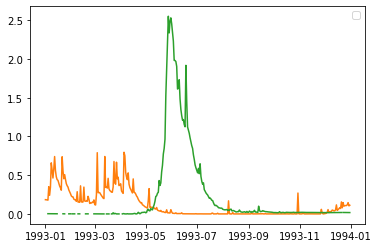

No handles with labels found to put in legend.


mean_zwattablrt


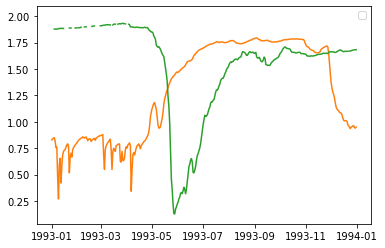

No handles with labels found to put in legend.


max_sfcheadsubrt


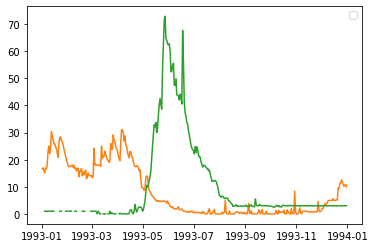

No handles with labels found to put in legend.


max_zwattablrt


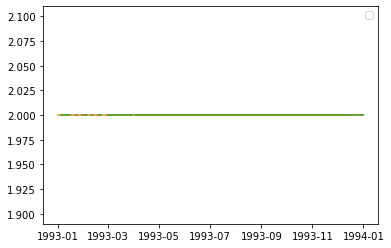

In [14]:
for plot_this in rt_v2_1day_ave[sample_basin].columns.values:
    print(plot_this)
    for ib in [10, 200, 400, 500]:
        b = basins[ib]
        plt.plot(rt_v2_1day_ave[b].loc[rt_v2_1day_ave[b].index.values[0:365],plot_this])
    plt.legend()
    plt.show()
    plt.close()

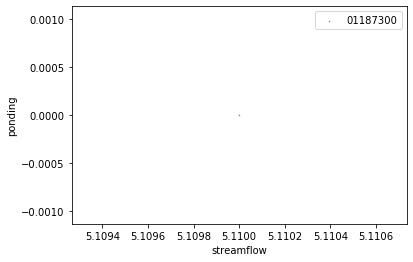

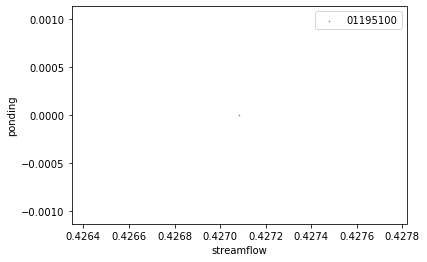

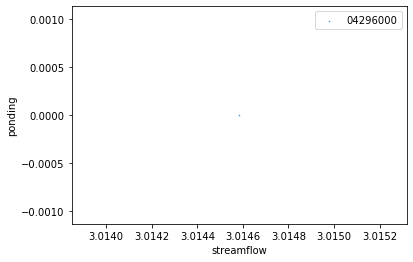

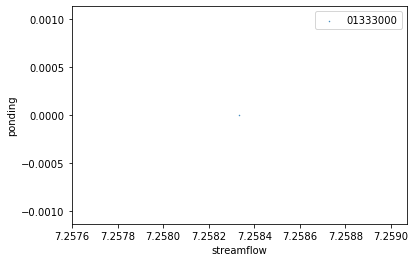

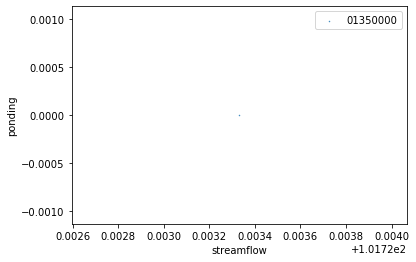

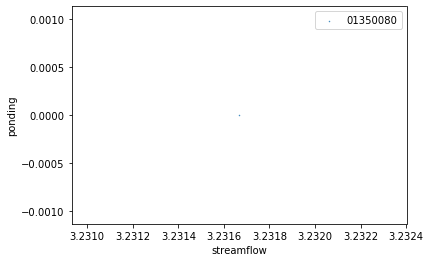

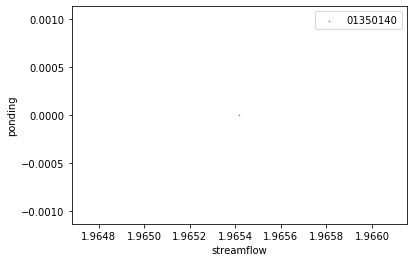

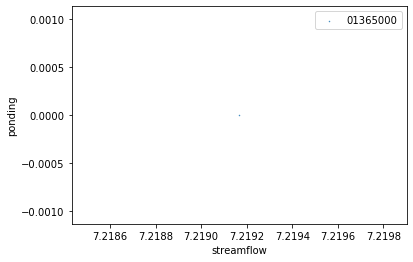

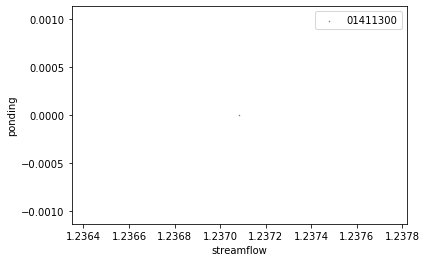

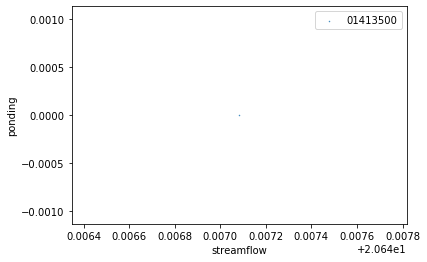

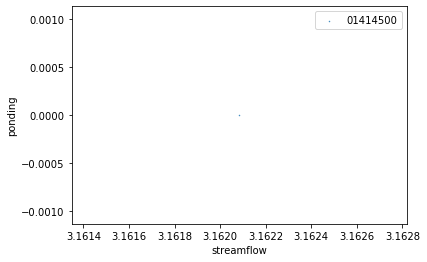

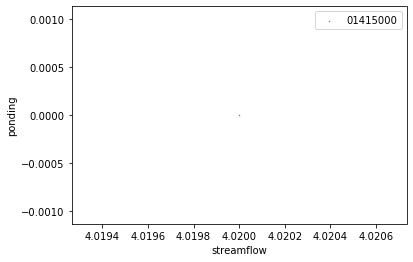

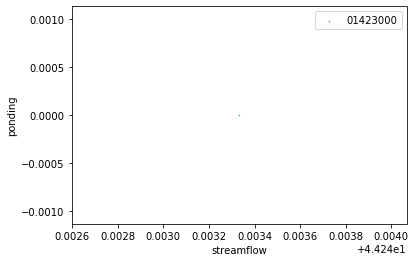

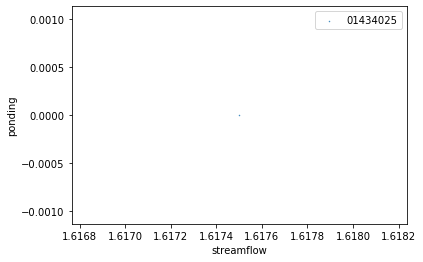

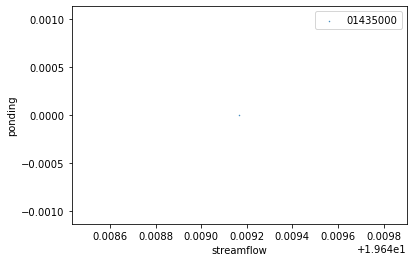

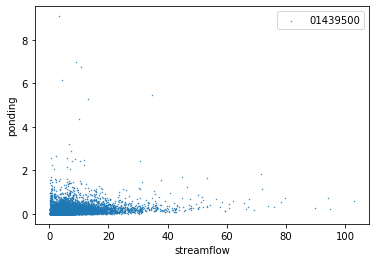

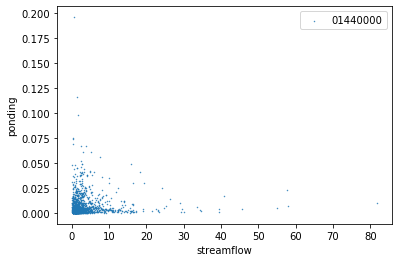

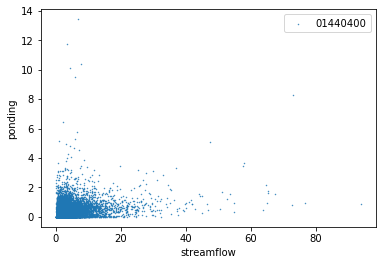

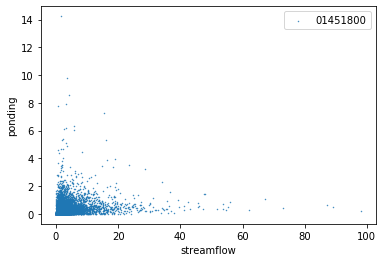

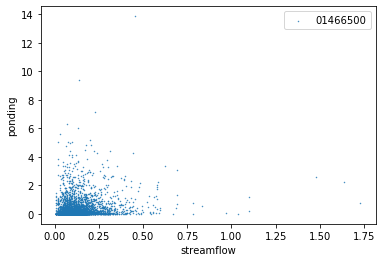

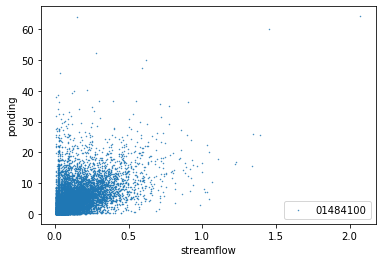

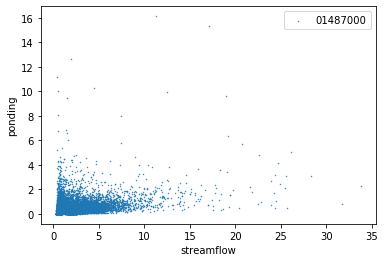

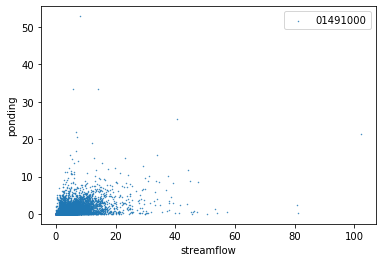

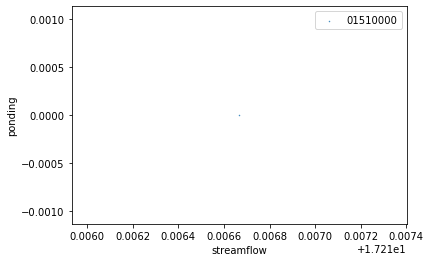

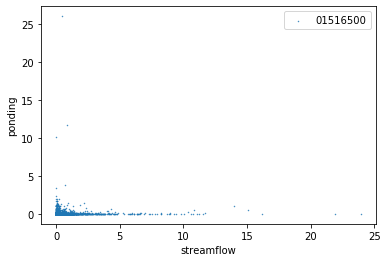

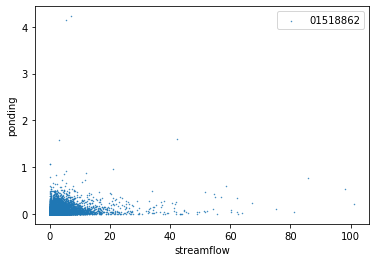

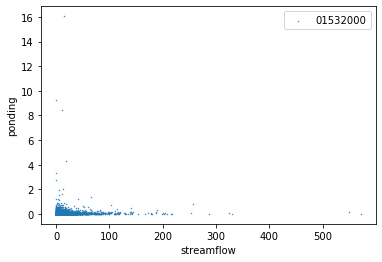

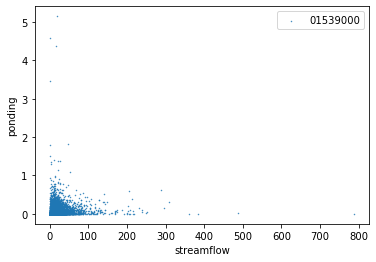

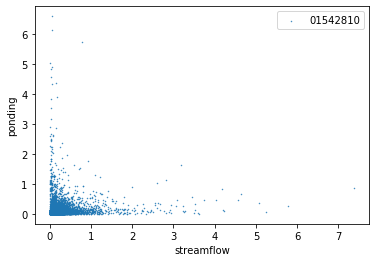

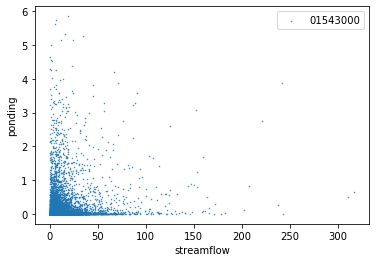

In [19]:
for ib in range(20, 50):
    b = basins[ib]
    strmflw = v2_dyn_feat[b].loc[v2_dyn_feat[b].index.values, 'streamflow']
    rt = rt_v2_1day_ave[b].loc[v2_dyn_feat[b].index.values,'mean_sfcheadsubrt']
    plt.scatter(strmflw,rt, s=0.2, label=b)
    plt.xlabel('streamflow')
    plt.ylabel('ponding')
    plt.legend()
    plt.show()
    plt.close()